In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn
import seaborn as sns
import pandas as pd

In [3]:
system_str = 'rank1_rnn';
behavior_str = 'bistable';


last_ind 50
last_ind 50
last_ind 50
last_ind 50
last_ind 50
last_ind

/Users/sbittner/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


 50


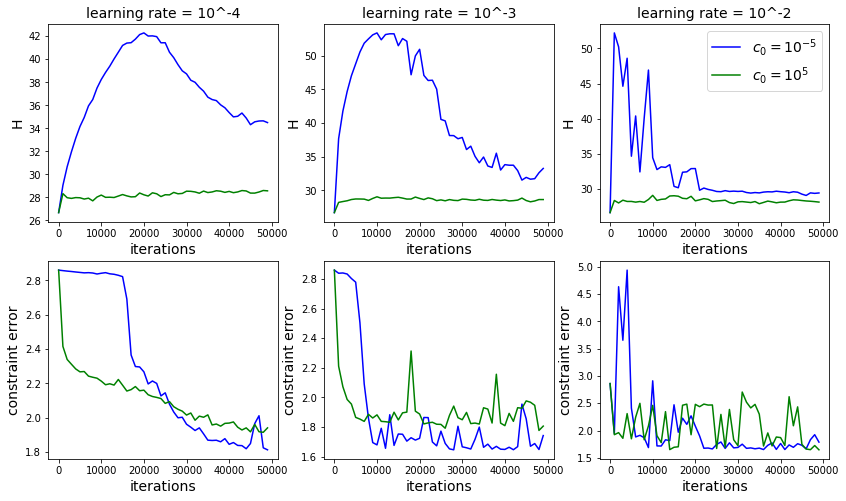

last_ind 46
last_ind 47
last_ind 46
last_ind 47
last_ind 45
last_ind 46


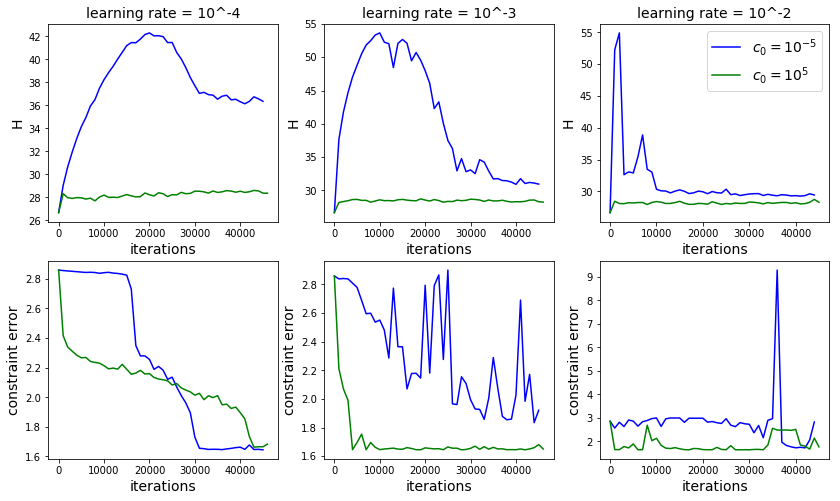

In [11]:
fontsize = 14;
resdir = '/Users/sbittner/Documents/dsn/notebooks/results/rank1_rnn/';

D = 20;
if (D==20):
    flow_strings = ['10P'];
else:
    flow_strings = ['25P'];
num_flow_strings = len(flow_strings);
lr_orders = [-4, -3, -2];
num_lr_orders = len(lr_orders);
colors = ['b', 'g', 'r'];
Ts = [10, 15];
num_Ts = len(Ts);
dt = 0.1;\

c_init_orders = [-5,5];
num_c_init_orders = len(c_init_orders);

legendstrs = [(r'$c_0 = 10^{%d}$' % i) for i in c_init_orders];

for i in range(num_flow_strings):
    flow_string = flow_strings[i];
    for l in range(num_Ts):
        T = Ts[l];
        plt.figure(figsize=(14,8));
        for j in range(num_lr_orders):
            lr_order = lr_orders[j];
            for k in range(num_c_init_orders):
                c_init_order = c_init_orders[k];
                fname = resdir + '%s_D=%d_T=%d_flow=%s_lr_order=%d_c=%d_rs=0/results.npz' % \
                                   (system_str, D, T, flow_string, lr_order, c_init_order);
                npzfile = np.load(fname);

                costs = npzfile['costs'];
                check_rate = npzfile['check_rate'];
                Hs = npzfile['Hs'];
                T_xs = npzfile['T_xs'];
                if (i==0 and l==0 and j==0 and k==0):
                    mu = npzfile['mu'];
                zero_inds = np.where(T_xs[:,-1] == 0.0)[0];
                if (len(zero_inds) > 0):
                    last_ind = zero_inds[0]-1;
                else:
                    last_ind = T_xs.shape[0]-1;
                print('last_ind', last_ind)
                nits = npzfile['it'];


                iterations = np.arange(0, nits, check_rate);
                ind = (nits+1) // check_rate;
                plt.subplot(2,3,j+1);
                plt.plot(iterations, Hs[:ind], c=colors[k]);
                plt.ylabel('H', fontsize=fontsize);
                if (k==0):
                    plt.title('learning rate = 10^%d' % lr_order, fontsize=fontsize);
                #if (j==1 and k==(num_c_init_orders-1)):
                    
                plt.xlabel('iterations', fontsize=fontsize);

                if (j==2 and k==(num_c_init_orders-1)):
                    plt.legend(legendstrs, fontsize=fontsize);
                
                con_err = np.sum(np.square(T_xs - np.expand_dims(mu,0)), 1);
                
                plt.subplot(2,3,3+j+1);
                plt.plot(iterations, con_err[:ind], c=colors[k]);
                plt.xlabel('iterations', fontsize=fontsize);
                plt.ylabel('constraint error', fontsize=fontsize);
        #plt.savefig('DHO_%s.pdf' % flow_string);
        plt.show();

